## **1. Two-site Hubbard model** 

Consider a half-filled ($N_{e}=2$, where $N_{e}$ is the number of electrons) two-site Hubbard model:

$$
H = -t\sum_{\sigma}\left[c^{\dagger}_{1\sigma}c_{2\sigma} + c^{\dagger}_{2\sigma}c_{1\sigma}\right]
    + U\left(\hat{n}_{1\uparrow}\hat{n}_{1\downarrow} + \hat{n}_{2\uparrow}\hat{n}_{2\downarrow}\right)
$$




Construct the associated Hamiltonian matrix in the basis of all possible states (Slater determinants) with $N_{e}=2$ in second quantization and diagonalize it exactly to find the ground state. Plot the ground state energy as a function of t/U.
 



In [37]:
import numpy as np
from itertools import combinations
import sympy as sp
import matplotlib.pyplot as plt

In [30]:
def generate_basis_states():
    """
    Generate all possible states for 2 electrons in 4 orbitals.
    Returns: List of binary strings like ['1100', '1010', ...]
    """
    basis_states = []
    
    # We have 4 orbitals (0,1,2,3): 2 sites × 2 spins
    # Choose 2 orbitals to be occupied (2 electrons)
    for occupied in combinations(range(4), 2):
        # Start with all zeros: ['0', '0', '0', '0']
        state = ['0'] * 4
        # Set the occupied orbitals to '1'
        for pos in occupied:
            state[pos] = '1'
        
        # Convert list to string: ['1','1','0','0'] → "1100"
        state_str = ''.join(state)
        basis_states.append(state_str)
    
    return basis_states

In [31]:
# Return the physical information for the input basis state
def basis_state_info(basis_state):
    up1 = int(basis_state[0])    # site 1, spin up
    down1 = int(basis_state[1])  # site 1, spin down
    up2 = int(basis_state[2])    # site 2, spin up
    down2 = int(basis_state[3])  # site 2, spin down

    if up1 == 1 and down1 == 1:
        site1_desc = "↑↓ (doubly occupied)"
    elif up1 == 1:
        site1_desc = "↑"
    elif down1 == 1:
        site1_desc = "↓"
    else:
        site1_desc = "empty"

    if up2 == 1 and down2 == 1:
        site2_desc = "↑↓ (doubly occupied)"
    elif up2 == 1:
        site2_desc = "↑"
    elif down2 == 1:
        site2_desc = "↓"
    else:
        site2_desc = "empty"
    
    print(f"{basis_state}")
    print(f"  Site 1: {site1_desc}")
    print(f"  Site 2: {site2_desc}")


In [32]:
# Map the basis states to state indices to construct the Hamiltonian matrix
def state_index_mapping(basis_states):
    """
    Create dictionary mapping state strings to matrix indices.
    Example: {"1100": 0, "1010": 1, ...}
    """
    state_idx = {}
    for i, state in enumerate(basis_states):
        state_idx[state] = i
    return state_idx

In [34]:
#Function to create the associated Hamiltonian matrix with inputs t and U
def Hubbard_Hamiltonian_matrix(basis_states,t,U):
    state_dict = state_index_mapping(basis_states)
    matrix = sp.zeros(6)
    
    for i in basis_states:
        if i[2]=='1' and i[0]=='0':
            temp_list=list(i)
            temp_list[2]='0'
            temp_list[0]='1'
            temp_string=''.join(temp_list)
            column=state_dict[i]
            row=state_dict[temp_string]
            matrix[row, column]=-t

        if i[0]=='1' and i[2]=='0':
            temp_list=list(i)
            temp_list[0]='0'
            temp_list[2]='1'
            temp_string=''.join(temp_list)
            column=state_dict[i]
            row=state_dict[temp_string]
            matrix[row, column]=-t

        if i[3]=='1' and i[1]=='0':
            temp_list=list(i)
            temp_list[3]='0'
            temp_list[1]='1'
            temp_string=''.join(temp_list)
            column=state_dict[i]
            row=state_dict[temp_string]
            matrix[row, column]=-t   

        if i[1]=='1' and i[3]=='0':
            temp_list=list(i)
            temp_list[1]='0'
            temp_list[3]='1'
            temp_string=''.join(temp_list)
            column=state_dict[i]
            row=state_dict[temp_string]
            matrix[row, column]=-t   


        if i[0]=='1' and i[1]=='1':
            column=state_dict[i]
            row=state_dict[i]
            matrix[row, column]= U

        if i[2]=='1' and i[3]=='1':
            column=state_dict[i]
            row=state_dict[i]
            matrix[row, column]= U


    return matrix




In [35]:
basis=generate_basis_states()
t, U = sp.symbols('t U', real=True)
HH_matrix=Hubbard_Hamiltonian_matrix(basis,t,U) 
sp.pprint(HH_matrix)
print()


⎡U   0  -t  -t  0  0 ⎤
⎢                    ⎥
⎢0   0  0   0   0  0 ⎥
⎢                    ⎥
⎢-t  0  0   0   0  -t⎥
⎢                    ⎥
⎢-t  0  0   0   0  -t⎥
⎢                    ⎥
⎢0   0  0   0   0  0 ⎥
⎢                    ⎥
⎣0   0  -t  -t  0  U ⎦



In [36]:
#Diagonalize the matrix
eigenvects = HH_matrix.eigenvects()

print("\nEigenvectors with corresponding eigenvalues:")
for eigval, multiplicity, eigenvectors in eigenvects:
    print(f"\nEigenvalue: λ = {sp.simplify(eigval)}")
    
    for i, vec in enumerate(eigenvectors):
        # vec is a Matrix column vector
        # Simplify and show as expressions of t and U
        vec_simplified = sp.simplify(vec)
        print(f"  Eigenvector {i+1}:")
        print(f"    {vec_simplified.T}")  





Eigenvectors with corresponding eigenvalues:

Eigenvalue: λ = 0
  Eigenvector 1:
    Matrix([[0, 1, 0, 0, 0, 0]])
  Eigenvector 2:
    Matrix([[0, 0, -1, 1, 0, 0]])
  Eigenvector 3:
    Matrix([[0, 0, 0, 0, 1, 0]])

Eigenvalue: λ = U
  Eigenvector 1:
    Matrix([[-1, 0, 0, 0, 0, 1]])

Eigenvalue: λ = U/2 - sqrt(U**2 + 16*t**2)/2
  Eigenvector 1:
    Matrix([[1, 0, (U + sqrt(U**2 + 16*t**2))/(4*t), (U + sqrt(U**2 + 16*t**2))/(4*t), 0, 1]])

Eigenvalue: λ = U/2 + sqrt(U**2 + 16*t**2)/2
  Eigenvector 1:
    Matrix([[1, 0, (U - sqrt(U**2 + 16*t**2))/(4*t), (U - sqrt(U**2 + 16*t**2))/(4*t), 0, 1]])


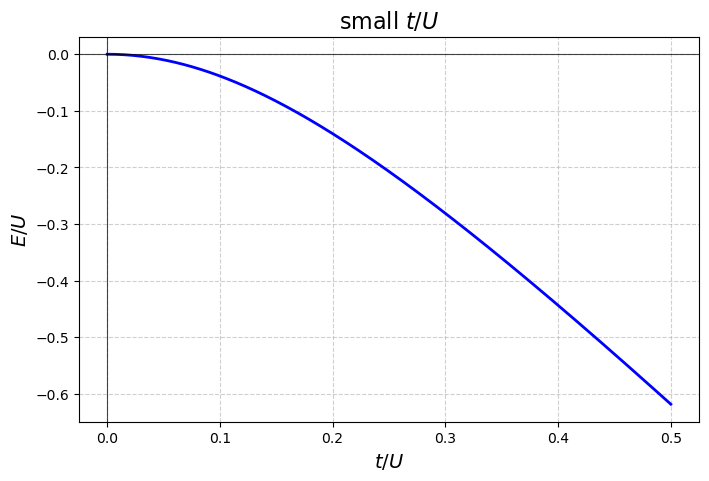

In [52]:

# Define the function E/U in terms of x = t/U
def E_over_U(x):
    return (1 - np.sqrt(1 + 16 * x**2)) / 2

# Generate x values
x_vals = np.linspace(0, 0.5, 400)  # t/U from 0 to 2

# Compute y values
y_vals = E_over_U(x_vals)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, 'b-', linewidth=2)
plt.xlabel(r'$t/U$', fontsize=14)
plt.ylabel(r'$E/U$', fontsize=14)
plt.title('small $t/U$', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0, color='k', linewidth=0.8, alpha=0.7)
plt.axvline(x=0, color='k', linewidth=0.8, alpha=0.7)

# Show the plot
plt.show()

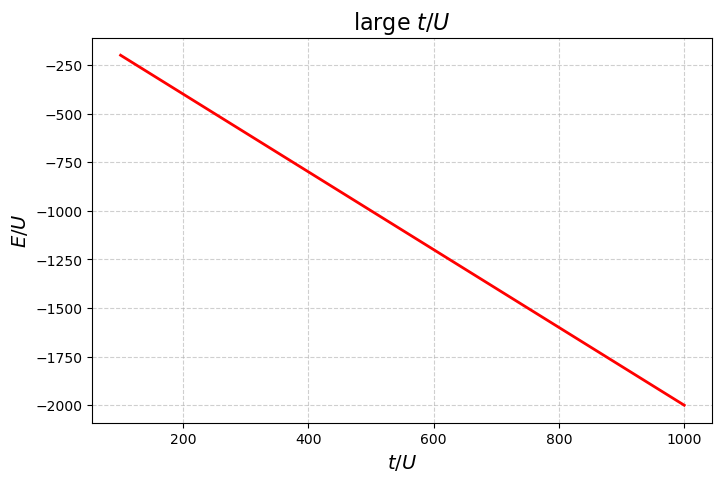

In [55]:



# Generate x values for large t/U
x_vals = np.linspace(100, 1000, 400)  # t/U from 100 to 1000

# Compute y values
y_vals = E_over_U(x_vals)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, 'r-', linewidth=2)
plt.xlabel(r'$t/U$', fontsize=14)
plt.ylabel(r'$E/U$', fontsize=14)
plt.title('large $t/U$', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()